In [2]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
import HDF5
using BenchmarkTools

In [3]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BenchmarkTools
using DSP

In [4]:
# using Revise
using Random123
using BAT 

In [51]:
# PRL

SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [68]:
# Thesis: 

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [5]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

prior = NamedTupleDist(
        tr_size = [0.13 .. 0.17, 0.13 .. 0.17],
        tr_size_2 = [0.08 .. 0.11, 0.08 .. 0.11],
        ang_spr = [5 .. 7, 5 .. 7],
        ang_spr_2 = [2 .. 4, 2 .. 4],
        mixt_pow =  0.60 .. 1.0 ,
        waist = [2.8 .. 3.3],
        waist_2 = [2.8 .. 3.3], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9,
        resx = [1, 1, 1], 
        resy = [1, 1, 1], 
        cam4_resx = 2.0 .. 4.00, 
        cam4_resy = 2.0 .. 4.00, 
        psx = [27.1, 21.6, 114.0], 
        psy = [30.5, 23.4, 125.0], 
        cam4_psx = 121.8, 
        cam4_psy = 120.0, 
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.115]
    );

In [7]:
samples_nt = bat_read("../../data/sampling_results/Benchmark-16/samples-simulated-nontruncated.hdf5").result
samples_nt = varshape(prior).(samples_nt);

In [8]:
samples_t = bat_read("../../data/sampling_results/Benchmark-16/samples-simulated-truncated.hdf5").result
samples_t = varshape(prior).(samples_t);

In [9]:
samples_nt = bat_sample(samples_nt, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [10]:
samples_t = bat_sample(samples_t, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [20]:
labels = [
    L"\sigma_{c,x}", 
    L"\sigma_{c,y}", 
    L"\sigma_{h,x}", 
    L"\sigma_{h,y}", 
    L"\sigma'_{c,x}", 
    L"\sigma'_{c,y}", 
    L"\sigma'_{h,x}", 
    L"\sigma'_{h,y}", 
    L"\alpha",
    L"s_{w,c}",
    L"s_{w,h}",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

ind_sorted = [3,4,1,2,7,8,5,6,9,11,10,12,13,14,15,16,17,18,18,20,21,22,23,24,25,26,27,];

truth = [0.15, 0.15, 0.10, 0.10, 6.0, 6.0, 3.0, 3.0, 0.7, 3.15, 2.9, 36.0, 37.0, 19.0, 33.0, 33.0, 34.0, 21.0, 35.0, 26.0, 1.5, 8.9, 3, 3, 8.5, 11.1, 2.5];

ind_sorted = [3,4,1,2,7,8,5,6,9,11,10,12,13,14,15,16,17,18,18,20,21,22,23,24,25,26,27,];

In [29]:
samples_flat_nt = flatview(unshaped.(samples_nt.v)) ./ truth;
samples_flat_t = flatview(unshaped.(samples_t.v)) ./ truth;

In [48]:
data_nt = [i for i in eachrow(samples_flat_nt)];
quant_nt = [(0.05, 0.95) for i in eachrow(samples_flat_nt)];

In [49]:
data_t = [i for i in eachrow(samples_flat_t)];
quant_t = [(0.05, 0.95) for i in eachrow(samples_flat_t)];

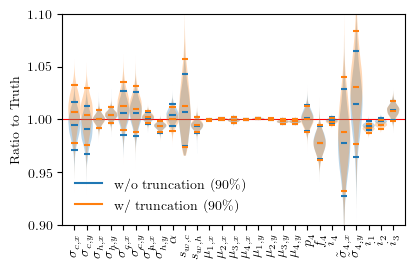

In [71]:
fig, ax = plt.subplots(1,1, figsize=(4.429223744292238, 2.737410817750676))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0)

parts = ax.violinplot(data_nt[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant_nt[ind_sorted])

parts = ax.violinplot(data_t[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant_t[ind_sorted],)

ax.plot([-10, -20], color=:C0, label="w/o truncation (90\\%)")
ax.plot([-10, -20], color=:C1, label="w/  truncation (90\\%)")

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
# ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.legend(framealpha=0.0, loc="lower left")
# ax.set_title("Simulated Event")
ax.set_ylim(0.9, 1.10)

# fig.savefig("../../plots-prl/toy-violin-truncation.pdf", bbox_inches = "tight")

# fig.savefig("../../plots/toy-violin-truncation.pdf", bbox_inches = "tight")